<a href="https://colab.research.google.com/github/hilakornis/-Qiskit-Textbook/blob/main/TurboPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !conda create -n depth-pro -y python=3.9
# !conda activate depth-pro

# !pip install -e .

In [ ]:
!git clone https://github.com/apple/ml-depth-pro.git

fatal: destination path 'ml-depth-pro' already exists and is not an empty directory.


In [ ]:
%cd /content/ml-depth-pro/src

/content/ml-depth-pro/src


In [ ]:
%ls

depth_pro/


In [ ]:
!source /content/ml-depth-pro/get_pretrained_models.sh   # Files will be downloaded to `checkpoints` directory.

--2025-02-08 18:42:11--  https://ml-site.cdn-apple.com/models/depth-pro/depth_pro.pt
Resolving ml-site.cdn-apple.com (ml-site.cdn-apple.com)... 17.253.53.208, 17.253.53.203, 2a01:b740:a02:f100::6, ...
Connecting to ml-site.cdn-apple.com (ml-site.cdn-apple.com)|17.253.53.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904446787 (1.8G) [binary/octet-stream]
Saving to: ‘checkpoints/depth_pro.pt’

depth_pro.pt        100%[===================>]   1.77G  19.4MB/s    in 1m 49s  

2025-02-08 18:44:01 (16.6 MB/s) - ‘checkpoints/depth_pro.pt’ saved [1904446787/1904446787]



In [ ]:
# %pip install -r /content/ml-depth-pro/pyproject.toml

In [ ]:
# !/content/ml-depth-pro/src/depth_pro/cli/run.py -i ./data/example.jpg

Traceback (most recent call last):
  File "/content/ml-depth-pro/src/depth_pro/cli/run.py", line 18, in <module>
    from depth_pro import create_model_and_transforms, load_rgb
ModuleNotFoundError: No module named 'depth_pro'


In [ ]:
# !python src/depth_pro/depth_pro.py


Traceback (most recent call last):
  File "/content/ml-depth-pro/src/depth_pro/depth_pro.py", line 20, in <module>
    from .network.decoder import MultiresConvDecoder
ImportError: attempted relative import with no known parent package


In [ ]:
%pip install pillow_heif


In [ ]:
from PIL import Image
import depth_pro

image_path = "/content/ml-depth-pro/data/TurboPi_Cropped_480p.jpg"

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()
# model.to("cuda")

# Load and preprocess an image.
image, _, f_px = depth_pro.load_rgb(image_path)
image = transform(image)
# f_px = f_px.to("cuda")

# Run inference.
prediction = model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

In [ ]:
focallength_px

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(depth)

NameError: name 'depth' is not defined

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Large-hf")

# load image
# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/content/ml-depth-pro/data/TurboPi_Cropped_480p.jpg")

# inference
depth = pipe(image)["depth"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


array([[ 61,  60,  61, ...,  45,  45,  43],
       [ 60,  60,  61, ...,  45,  45,  45],
       [ 60,  61,  60, ...,  45,  45,  45],
       ...,
       [195, 195, 195, ..., 194, 195, 195],
       [196, 195, 196, ..., 195, 195, 195],
       [196, 196, 196, ..., 195, 195, 196]], dtype=uint8)
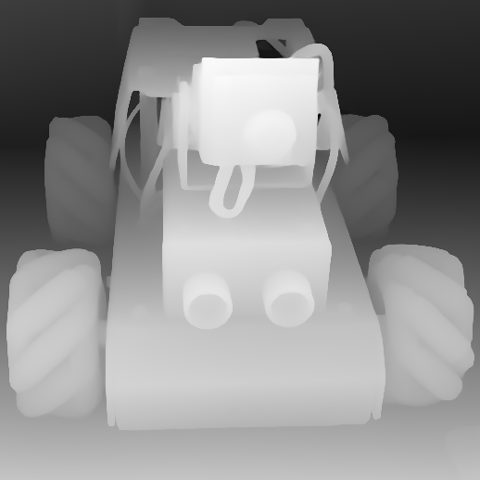

In [ ]:
import numpy as np

np.array(depth)